In [20]:
import rootpath
import sys
sys.path.append(rootpath.detect())
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from testsuite.results import Result, ResultsContainer

In [2]:
target_file = os.path.join(rootpath.detect(), "experiments/directed/template/targets/targets")
with open(target_file, 'r') as infile:
    targets = json.load(infile)

In [3]:
igdref_file = os.path.join(rootpath.detect(), "experiments/directed/template/targets/reference_points")
with open(igdref_file, 'r') as infile:
    IGD_REFPOINTS = json.load(infile)

In [4]:
IGD_REFPOINTS.keys()

dict_keys(['wfg1_2obj_3dim', 'wfg1_3obj_4dim', 'wfg1_4obj_5dim', 'wfg2_2obj_6dim', 'wfg2_3obj_6dim', 'wfg2_4obj_10dim', 'wfg3_2obj_6dim', 'wfg3_3obj_10dim', 'wfg3_4obj_10dim', 'wfg4_2obj_6dim', 'wfg5_2obj_6dim', 'wfg6_2obj_6dim', 'wfg4_3obj_8dim', 'wfg5_3obj_8dim', 'wfg6_3obj_8dim', 'wfg4_4obj_8dim', 'wfg5_4obj_10dim', 'wfg6_4obj_10dim'])

In [5]:
functions = sorted(os.listdir(os.path.join(rootpath.detect(), 'experiments/directed/data/')))
function_paths = {prob: [os.path.join(rootpath.detect(), 'experiments/directed/data/', prob, 'log_data/'), 
                         os.path.join(rootpath.detect(), 'experiments/directed/data_undirected_comp/', prob, 'log_data/', os.listdir(os.path.join(rootpath.detect(), 'experiments/directed/data_undirected_comp/', prob, 'log_data/'))[0])] for prob in functions}
# for problem, path in function_paths.items():
#     print(problem)
#     print(path[0])
#     print(path[1])
#     print()

In [6]:
problem = "wfg2_2obj_6dim"
wfg2_2obj_6dim_r = {}
for i, path in enumerate(os.listdir(function_paths[problem][0])):
    wfg2_2obj_6dim_r[i] = ResultsContainer(os.path.join(function_paths[problem][0], path))
    wfg2_2obj_6dim_r[i].add_reference_data(function_paths[problem][1])

In [7]:
for i, rs in wfg2_2obj_6dim_r.items():
    print(i)
    rs.compute_hpv_history()
    rs.compute_igd_history(reference_points=np.asarray(IGD_REFPOINTS[problem]))

0

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False

1
2
3
4
5


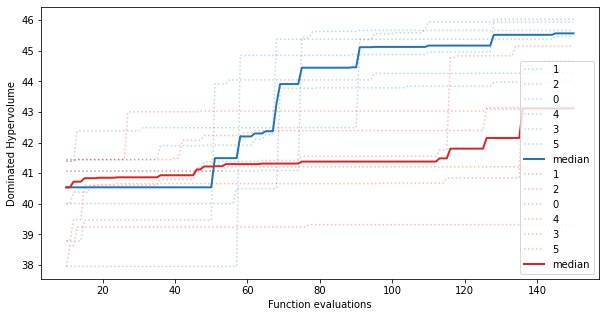

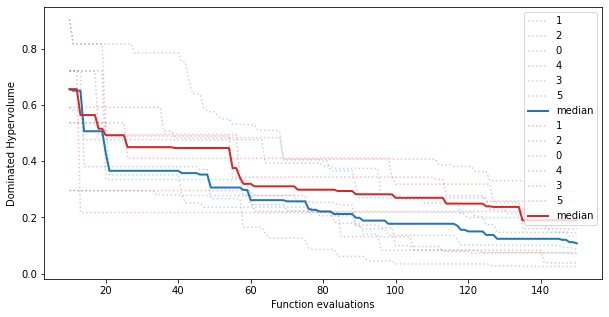

2 :3 reference points


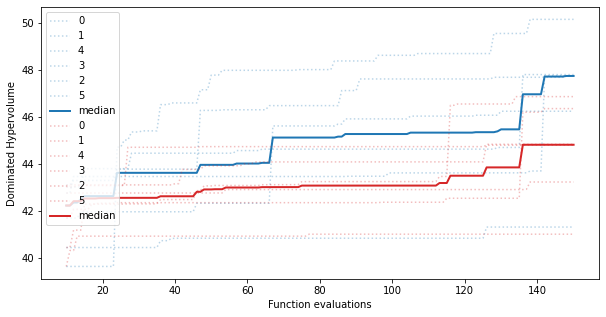

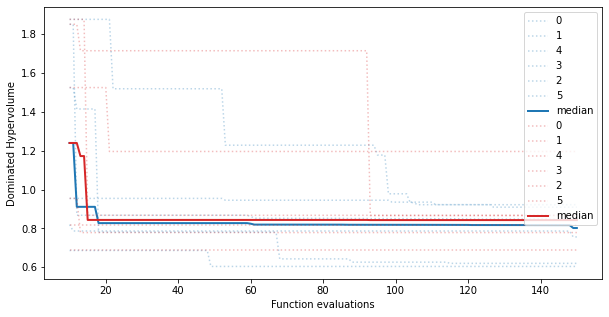

2 :392 reference points


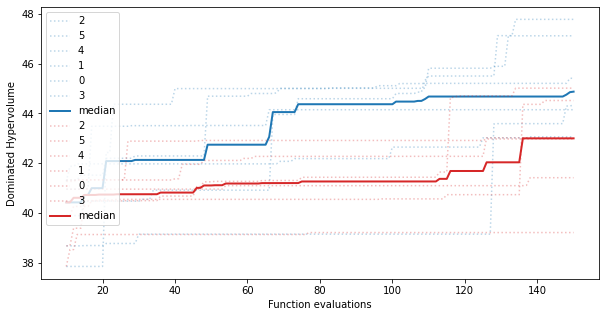

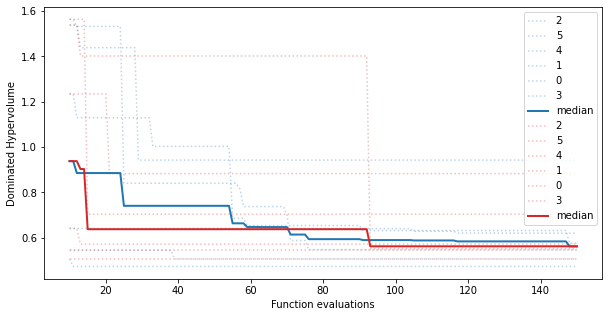

2 :208 reference points


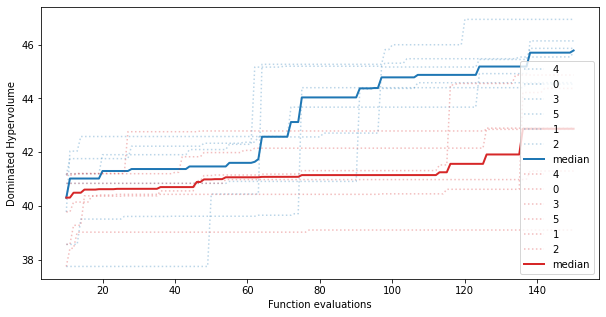

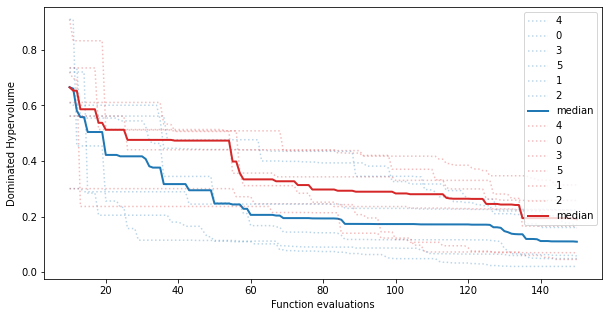

2 :338 reference points


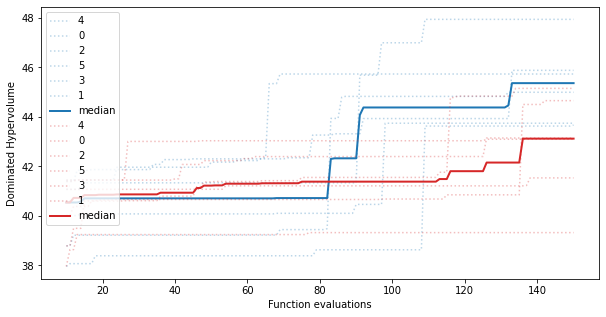

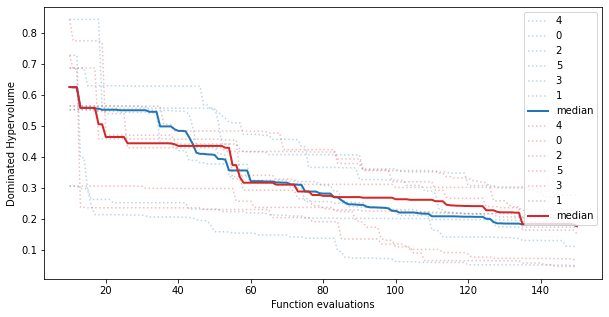

2 :426 reference points


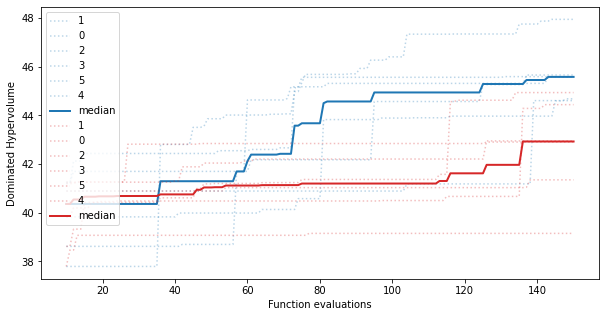

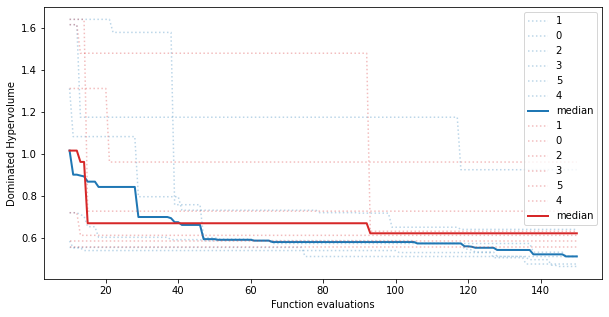

2 :2 reference points


In [8]:
for t in [0, 1, 2, 3, 4, 5]:
    fig0 = wfg2_2obj_6dim_r[t].plot_hpv()
    ax0 = fig0.gca()
    wfg2_2obj_6dim_r[t].plot_hpv(axis=ax0, reference=True, c="C3")
    
    fig1 = wfg2_2obj_6dim_r[t].plot_igd()
    ax1 = fig1.gca()
    wfg2_2obj_6dim_r[t].plot_igd(axis=ax1, reference=True, c="C3")
    plt.show()
    print(wfg2_2obj_6dim_r[t].n_obj[0], f":{wfg2_2obj_6dim_r[t][0].igd_refpoints.shape[0]} reference points")

In [ ]:
for t in [0, 1, 2, 3, 4, 5]:
    fig0 = plt.figure()
    ax0 = fig0.gca()
    wfg2_2obj_6dim_r[t].results[0].plot_front(axis=ax0, c="C0")
    wfg2_2obj_6dim_r[t].reference[0].plot_front(axis=ax0, c="C3")
    ax0.scatter(*wfg2_2obj_6dim_r[t].results[0].targets.T, c="magenta")

In [17]:
ans = ResultsContainer("/home/finley/phd/code/testsuite/experiments/directed/analysis/processed_results/wfg1_2obj_3dim__0p35_3p14__w_0p5_processed.pkl")
ans.results

In [19]:
ans.hpv_history

[None, None, None, None, None, None]

TypeError: 'NoneType' object is not iterable

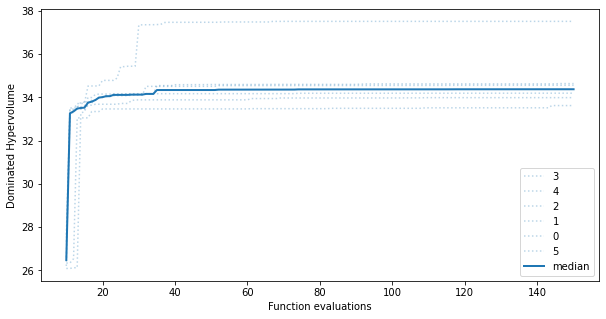

In [13]:
fig = ans.plot_hpv()
ax = fig.gca()
ans.plot_hpv(axis=ax, reference=True)